In [2]:
import pandas as pd
import gensim
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [3]:
# Import data
X = pd.read_csv('DATA/clean_data/cleaned_n_stemming_input_train.csv', sep=";", index_col=0)
y = pd.read_csv('DATA/output_train.csv', sep=";", index_col=0)

features = X.columns
targets = y['intention'].unique()

In [6]:
sentences = [sentence.split() for sentence in X['question'].values]

# Train word2vec in french

In [13]:
EPOCHS = 400
MIN_COUNT = 2
SIZE = 100
WINDOW = 4
WORKERS = 4

training_it = 1
scratch_model  = gensim.models.Word2Vec(sentences, 
                                        sg=1,
                                        sample=0.01,
                                        min_count=MIN_COUNT, 
                                        size=SIZE, 
                                        window=WINDOW, 
                                        compute_loss = True,
                                        iter=EPOCHS)


In [15]:
scratch_model.wv.save_word2vec_format(fname = 'DATA/trained_vectors/custom_word2vec/scratch_fr_stemming.bin', 
                                          fvocab='DATA/trained_vectors/custom_word2vec/scratch_fr_vocab_stemming.txt', 
                                          binary=True)

## Test custom word2vec in french built from scratch

In [16]:
scratch_model =gensim.models.KeyedVectors.load_word2vec_format(fname = 'DATA/trained_vectors/custom_word2vec/scratch_fr_stemming.bin', 
                                                               fvocab='DATA/trained_vectors/custom_word2vec/scratch_fr_vocab_stemming.txt', 
                                                               binary=True)

# Plot TSNE 
taken from https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

In [17]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()


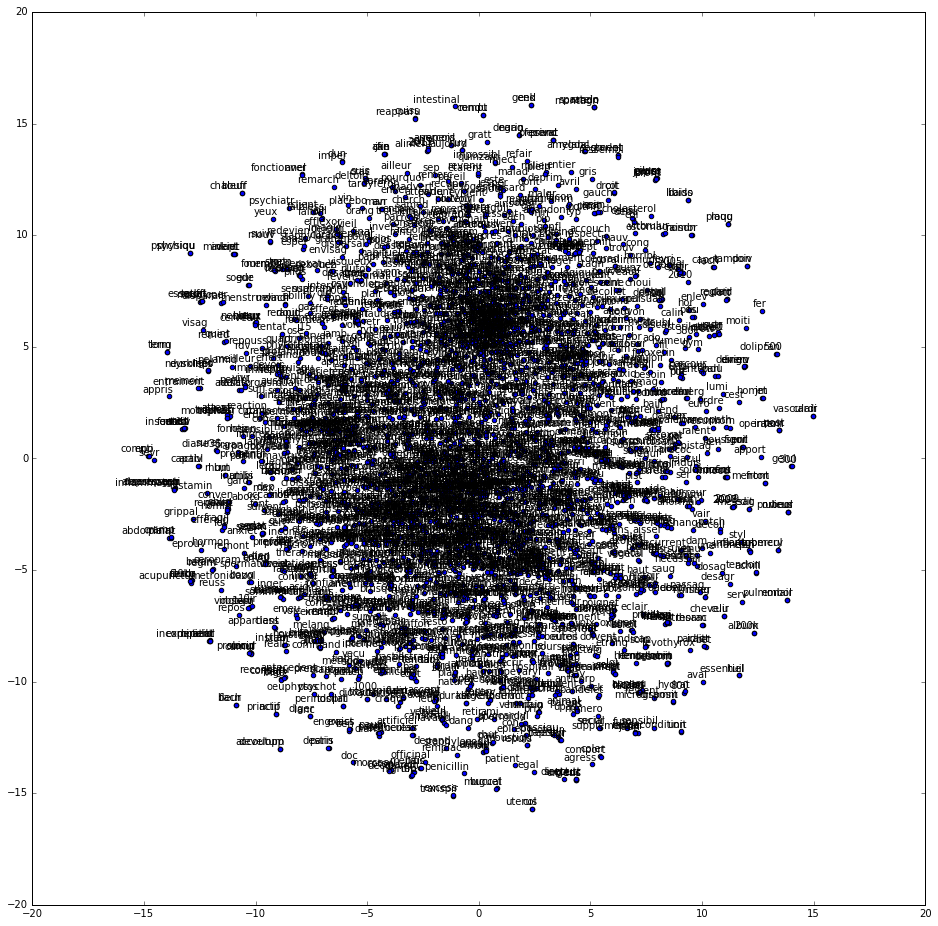

In [18]:
tsne_plot(scratch_model)

In [21]:
scratch_model.most_similar(["vendred"], topn=50)

[('dimanch', 0.5260429382324219),
 ('mercred', 0.5076400637626648),
 ('effiprev', 0.48490065336227417),
 ('jeud', 0.4730897545814514),
 ('zapp', 0.45696163177490234),
 ('ejacul', 0.45536574721336365),
 ('surlendemain', 0.4342406988143921),
 ('samed', 0.4276038408279419),
 ('proteg', 0.4164224863052368),
 ('oubli', 0.4073575735092163),
 ('novembr', 0.4052683413028717),
 ('lund', 0.40496760606765747),
 ('tentat', 0.40427976846694946),
 ('blanc', 0.4013241231441498),
 ('cke', 0.39697888493537903),
 ('mard', 0.39618948101997375),
 ('censi', 0.3941318392753601),
 ('jan', 0.39194124937057495),
 ('soir', 0.39120084047317505),
 ('rassur', 0.3825552463531494),
 ('ixiem', 0.3815613389015198),
 ('bull', 0.38084936141967773),
 ('dessous', 0.38035649061203003),
 ('lami', 0.376107782125473),
 ('arkogellul', 0.3754394054412842),
 ('complet', 0.37434327602386475),
 ('rattrap', 0.3721354305744171),
 ('<HEURE>', 0.3704919219017029),
 ('rendu', 0.362205445766449),
 ('jet', 0.36200857162475586),
 ('norlev